### **Assume the function is y² = x³ + ax + b mod G**

**Where p(x1,y1) or 1p(x1, y1)**

But, there are two formulas to find S. Find it in the code.

## 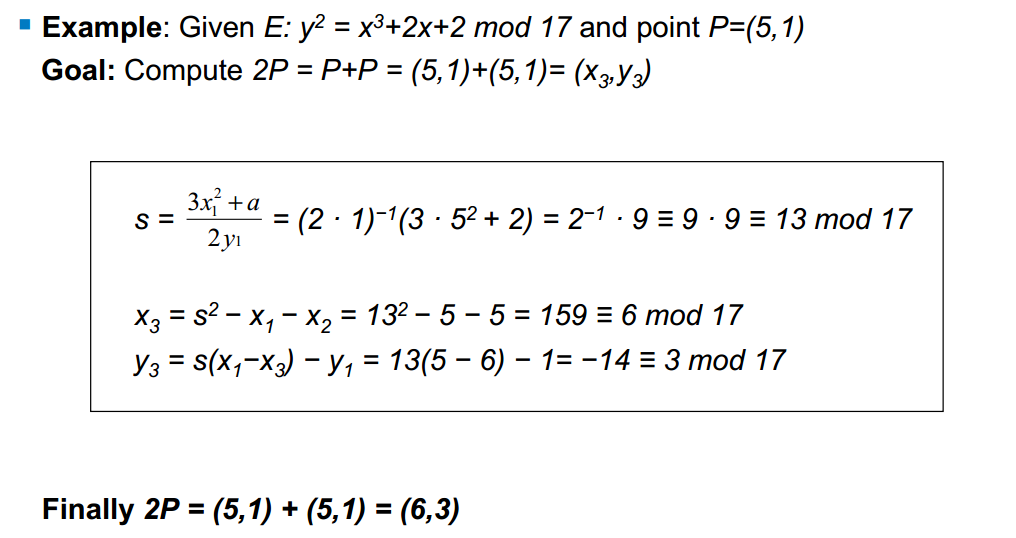

In [86]:
def S_addition(x1, y1, x2, y2, G):
  result1 = (y2-y1)
  result2 = (x2-x1)
  S1= result1 % G
  S2 = pow(result2,-1,G)
  S = S1*S2
  S = S % G                       # As, (w/z) mod num = ( (w mod num) * (z^-1 mod num) ) mod num
  #print("S:",S)
  return S

In [87]:
def S_double(x1, y1, G, a):
  result1 = (3 * (x1 ** 2) + a)
  result2 = (2*y1)
  S1 = result1 % G
  #print("S1:",S1)
  S2 = pow(result2,-1,G)
  #print("S2:",S2)
  S = S1*S2
  S = S % G                      # As, (w/z) mod num = ( (w mod num) * (z^-1 mod num) ) mod num
  #print("S:",S)
  return S

In [88]:
def X3(x1, x2, G, S):
  x3 = (S**2) -x1-x2
  x3= x3 % G
  #print(x3,S)
  return x3

In [89]:
def Y3(x1, y1, x3, G, S):
  y3 = S * (x1-x3)-y1
  y3 = y3 % G
  return y3

In [116]:
def ECC(a, b, x1, y1, G, check_numof_G=None, name=None):

  E_count = 1    # As p(x1,x2) is already given, so E_count = 1!
  x2 = x1
  y2 = y1
  #print(f"{E_count}p = ({x1}, {y1})")

  while(True):
    if (x1 == x2 and y1 == y2):
      S = S_double(x1, y1, G, a)
    else:
      S = S_addition(x1, y1, x2, y2, G)

    x3 = X3(x1, x2, G, S)
    y3 = Y3(x1, y1, x3, G, S)
    E_count += 1

    #print(f"{E_count}p = ({x3}, {y3})")

    if (E_count == check_numof_G):
      #print(f"{name}'s random value = {check_numof_G} and Key = ({x3},{y3})")
      return [int(x3), int(y3)]
    if (x1 == x3):
      E_count+=1
      break
    x2 = x3
    y2 = y3

  #print("Expected Output of #E: ",E_count)
  #print(dict)
  return E_count



In [118]:
import random

# Using this equation, y² = x³ + 2x + 2 mod 17
p = [5,1]
a = 2
b =2
G = 17

E_count= ECC(a, b, p[0], p[1], G)
print("Expected Output of #E: ",E_count)

# alice_a = random.randint(2, E_count-1)
# bob_b = random.randint(2, E_count-1)

# Take the values of alice_a and bob_b as 3 and 10 to detect that we are getting right answer or not!

alice_a = 3
bob_b = 10

A = ECC(a, b, p[0], p[1], G, alice_a, "Alice")
print(f"Alice's random value = {alice_a} and Key or {alice_a}p or {alice_a}({p[0]},{p[1]}) or A = ({A[0]},{A[1]})")

B = ECC(a, b, p[0], p[1], G, bob_b, "Bob")
print(f"Bob's random value = {bob_b} and Key or {bob_b}p or {bob_b}({p[0]},{p[1]}) or B= ({B[0]},{B[1]})")

# Now exchange the keys or A and B with each other. Then Alice will find the value of alice_a(B)=(x_ab,y_ab) and Bob will find the value of bob_b(A)=(x_ab,y_ab)

secret_key_alice = ECC(a, b, B[0], B[1], G, alice_a, "Alice")
secret_key_bob = ECC(a, b, A[0], A[1], G, bob_b, "Bob")

if (secret_key_alice[0]==secret_key_bob[0]):
  print(f"Successfully Secret Shared Key is generated and the shared secret key = {secret_key_alice[0]}")


Expected Output of #E:  19
Alice's random value = 3 and Key or 3p or 3(5,1) or A = (10,6)
Bob's random value = 10 and Key or 10p or 10(5,1) or B= (7,11)
Successfully Secret Shared Key is generated and the shared secret key = 13
